In [37]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from platform import python_version
from platform import python_version

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [38]:
entry_phase_color_map_val = [1, 2, 3, 4, 5]
entry_phase_color_map = ListedColormap(['red', 'green', 'blue', 'orange', 'purple'])

In [39]:
data_entry = pd.read_csv('entry_dump.csv')


data_entry['time'] = data_entry['dtegd'].cumsum()


data_entry.head()

data_entry.dtypes

,dtegd,tgtsite,alpha,delaz,drag,egflg,hls,lod,rdot,roll,...,tran5f_nom,tran5f_vtran,tran3f_vb1,tran3f_drefp4,tran4f_alfm,tran4f_drefp4,dummy,tgtsite0,Unnamed: 130,time
0,2,Edwards,40.0,6.879816,0.025402,0,399196.959122,0.226741,-521.252169,0.0,...,False,False,False,False,False,False,0,Edwards,NaN,2
1,2,Edwards,40.0,6.883591,0.026169,0,398154.507780,0.227800,-521.198669,0.0,...,False,False,False,False,False,False,0,Edwards,NaN,4
2,2,Edwards,40.0,6.887454,0.026963,0,397112.166797,0.228915,-521.141806,0.0,...,False,False,False,False,False,False,0,Edwards,NaN,6
3,2,Edwards,40.0,6.891339,0.027785,0,396069.942920,0.230089,-521.081559,0.0,...,False,False,False,False,False,False,0,Edwards,NaN,8
4,2,Edwards,40.0,6.895260,0.028638,0,395027.842936,0.231324,-521.017910,0.0,...,False,False,False,False,False,False,0,Edwards,NaN,10


dtegd              int64
tgtsite           object
alpha            float64
delaz            float64
drag             float64
                  ...   
tran4f_drefp4       bool
dummy              int64
tgtsite0          object
Unnamed: 130     float64
time               int64
Length: 132, dtype: object

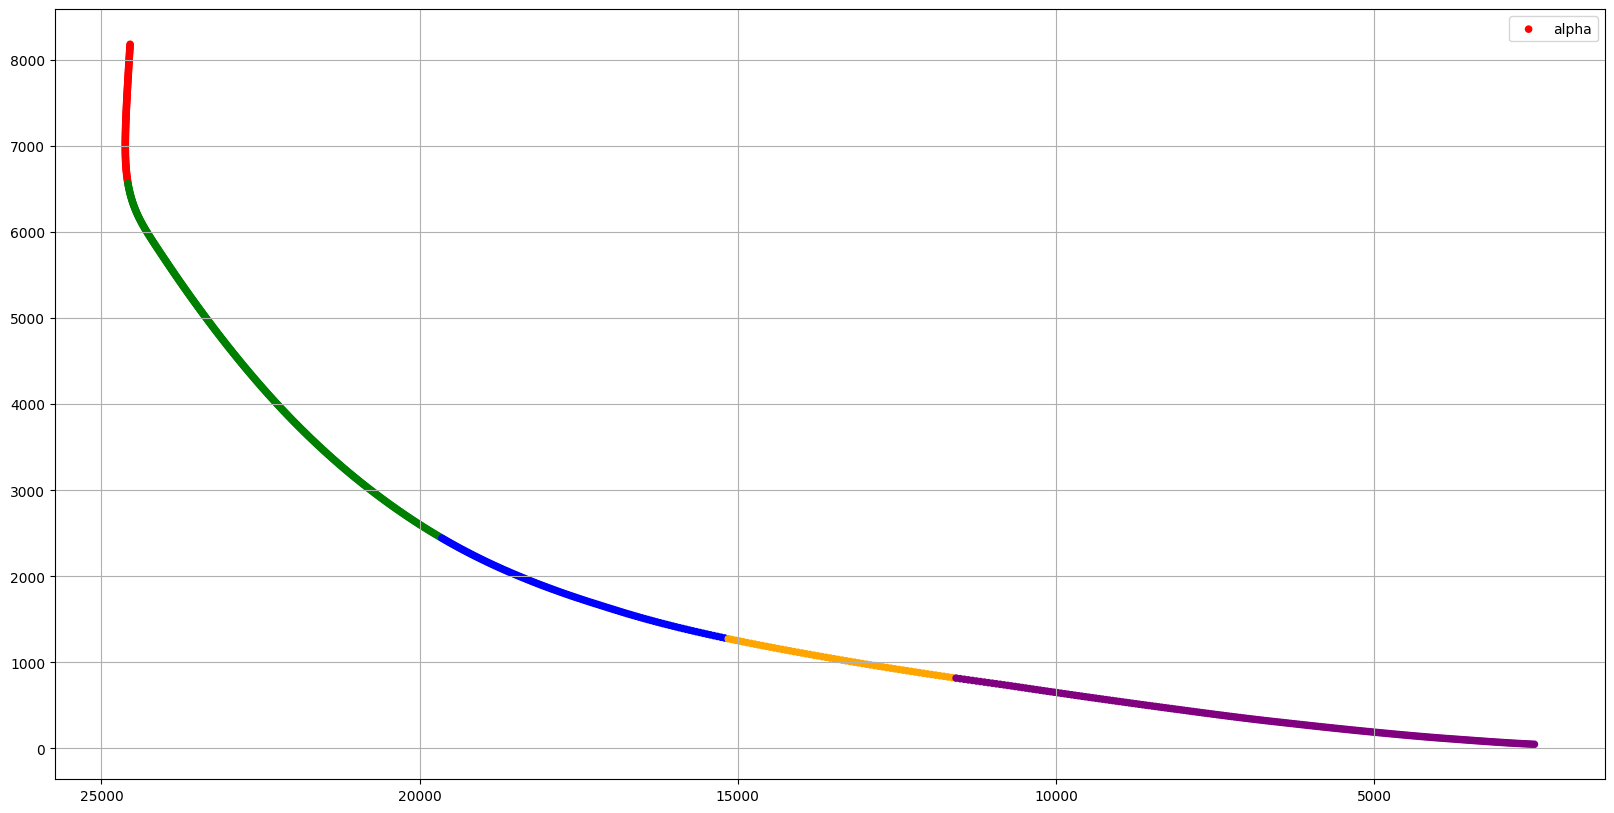

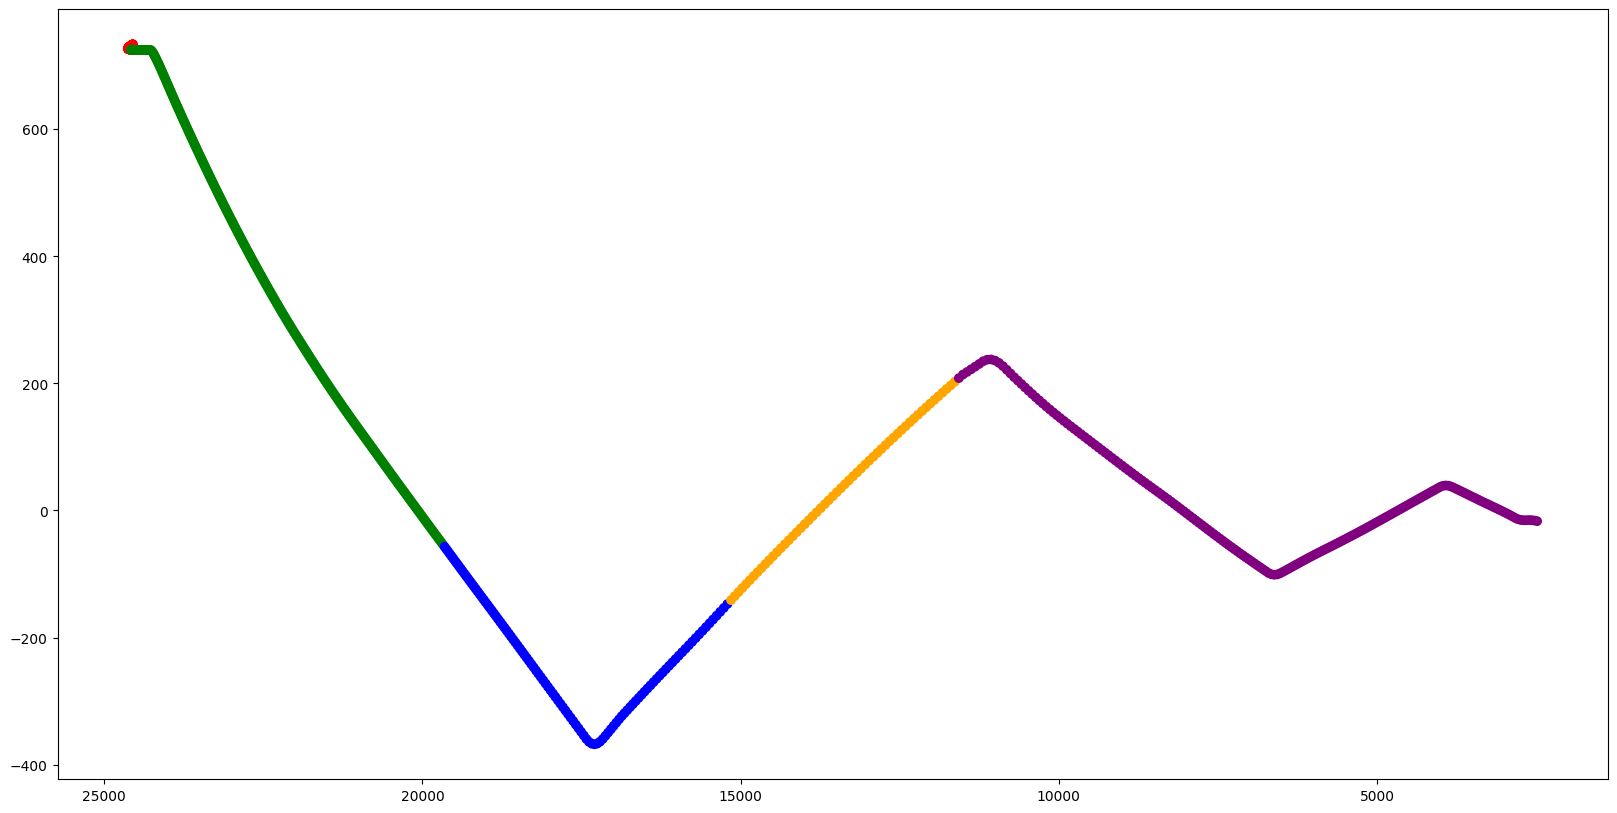

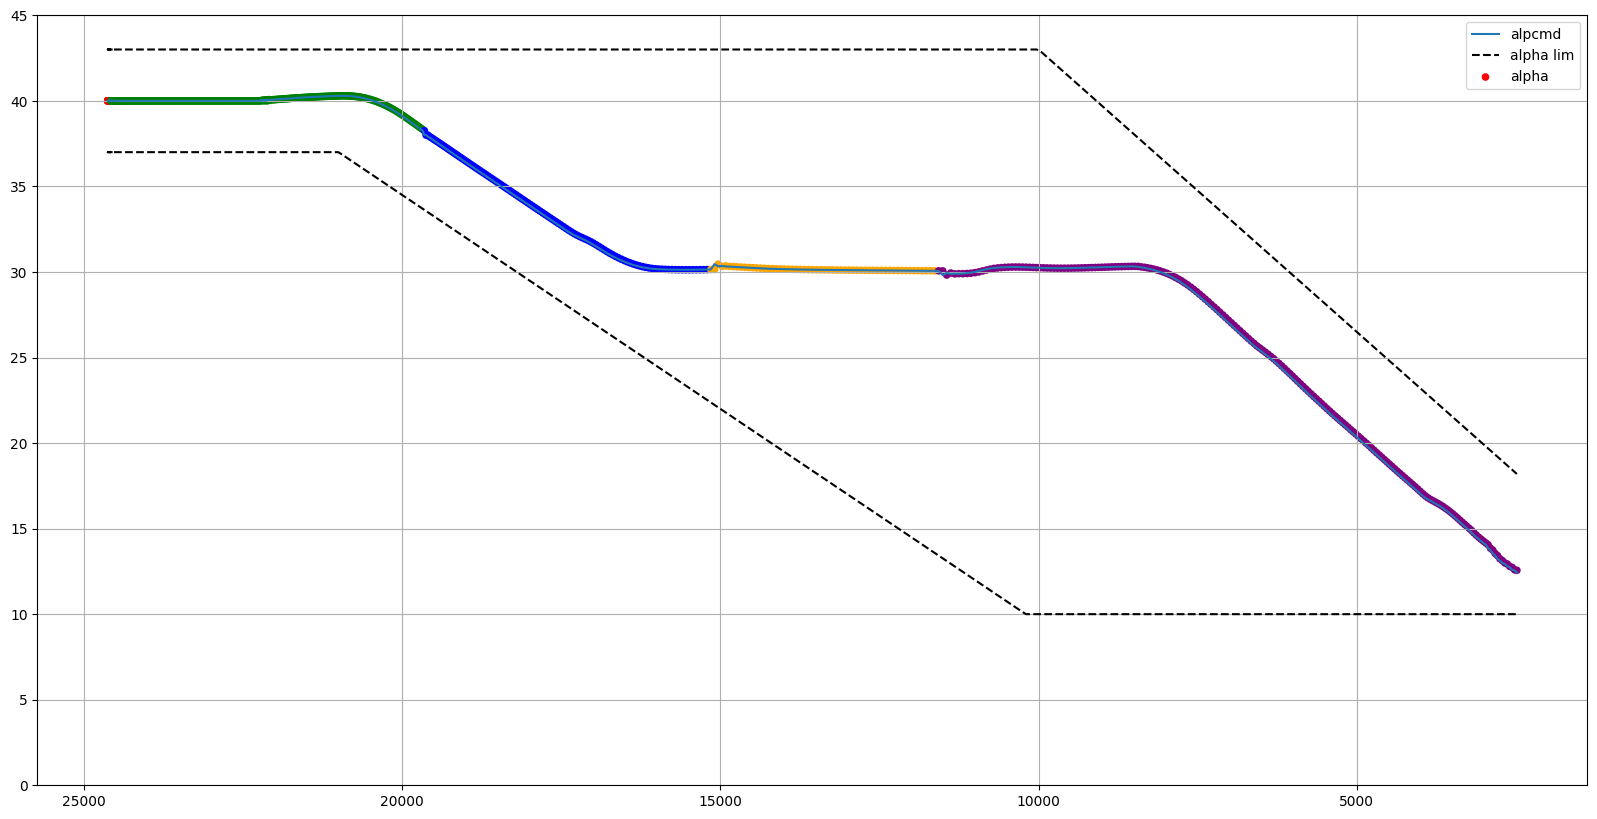

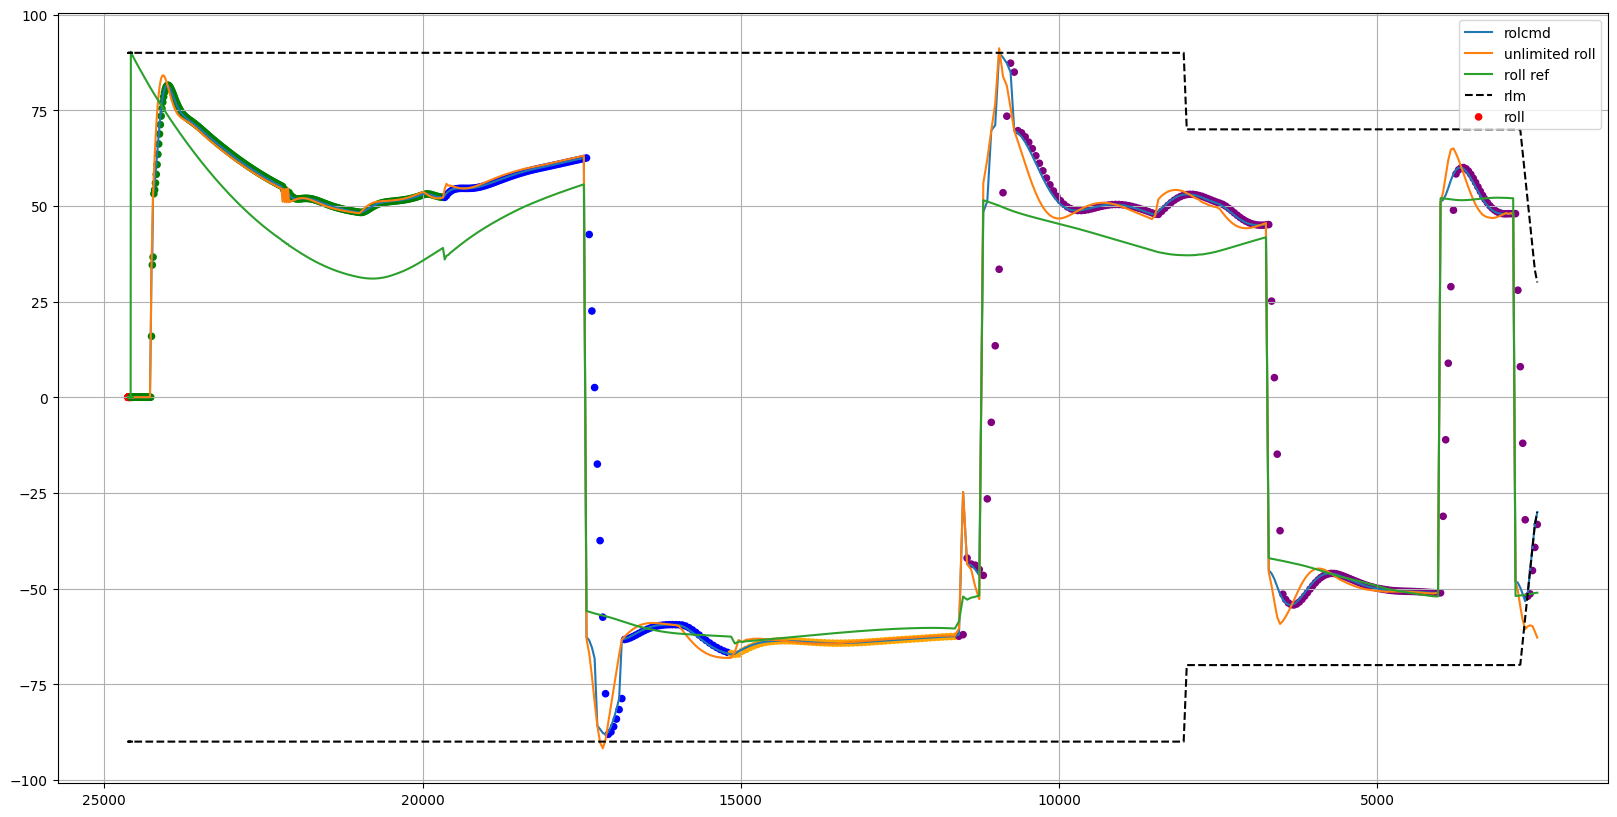

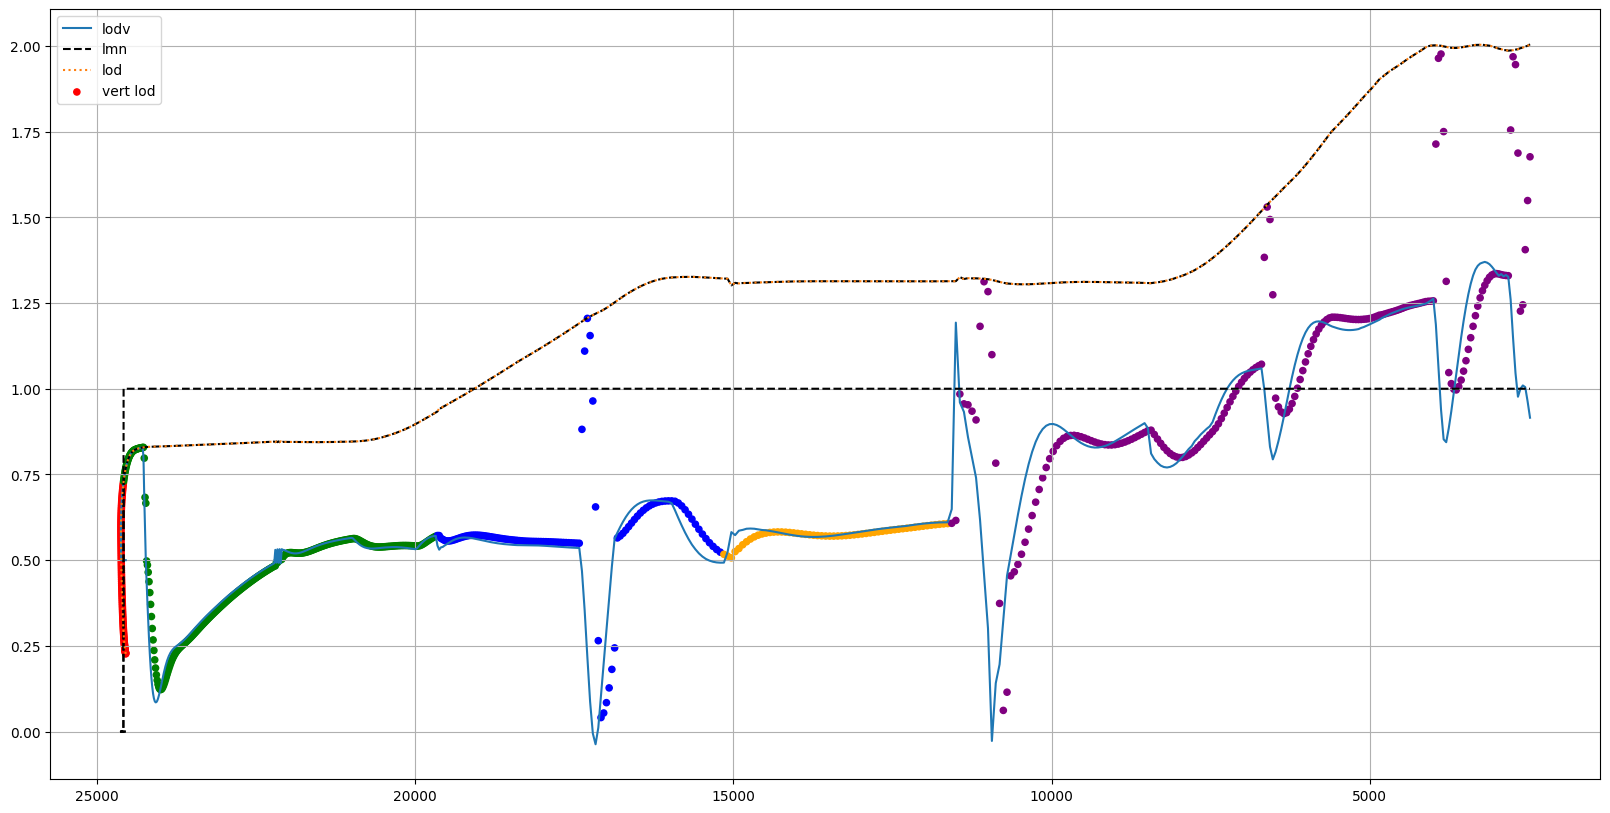

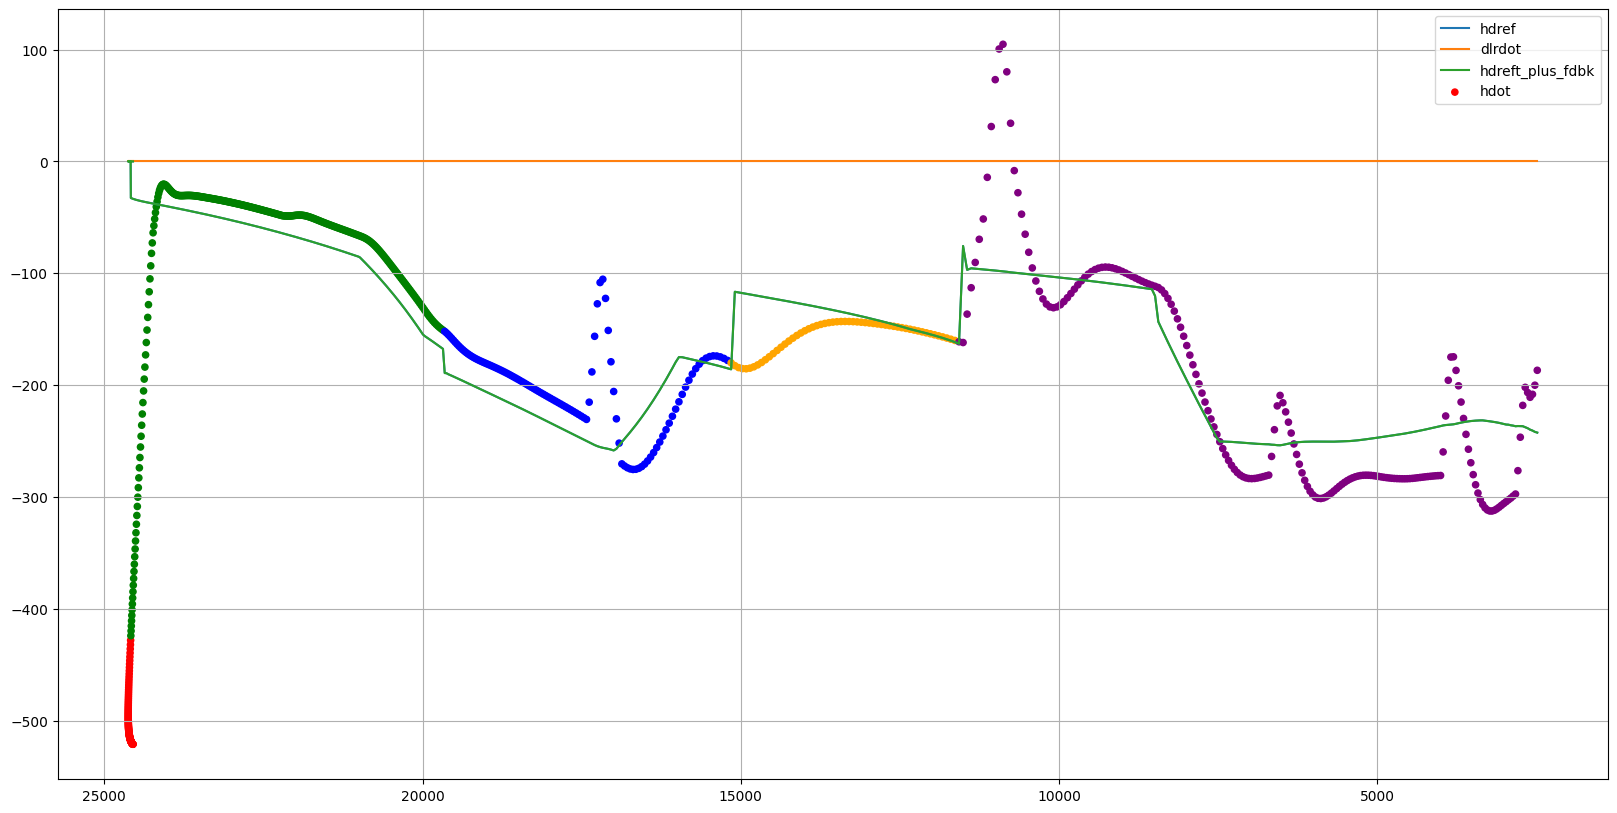

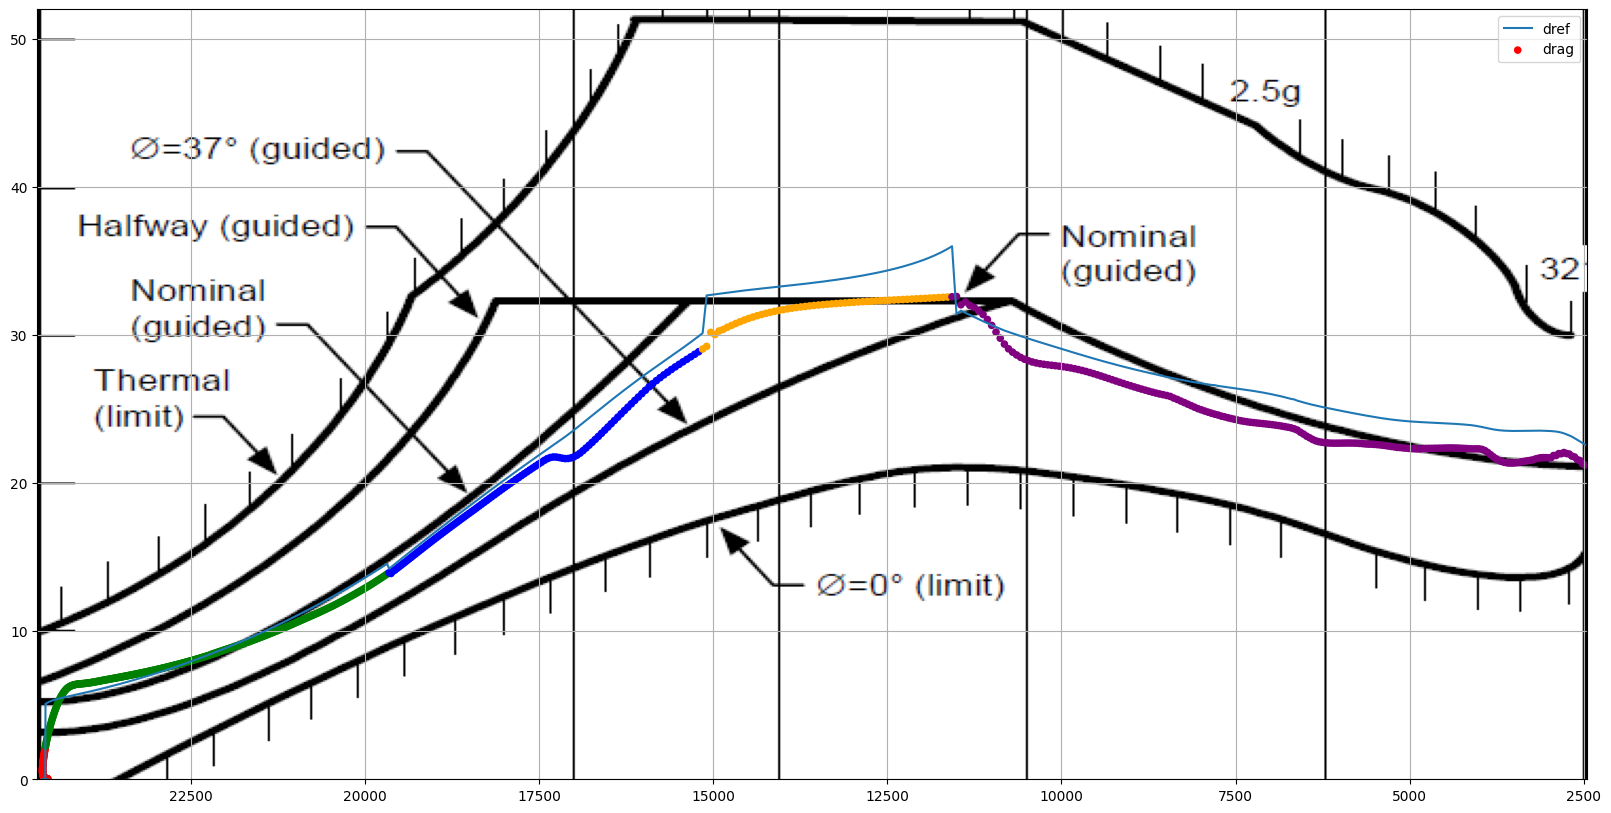

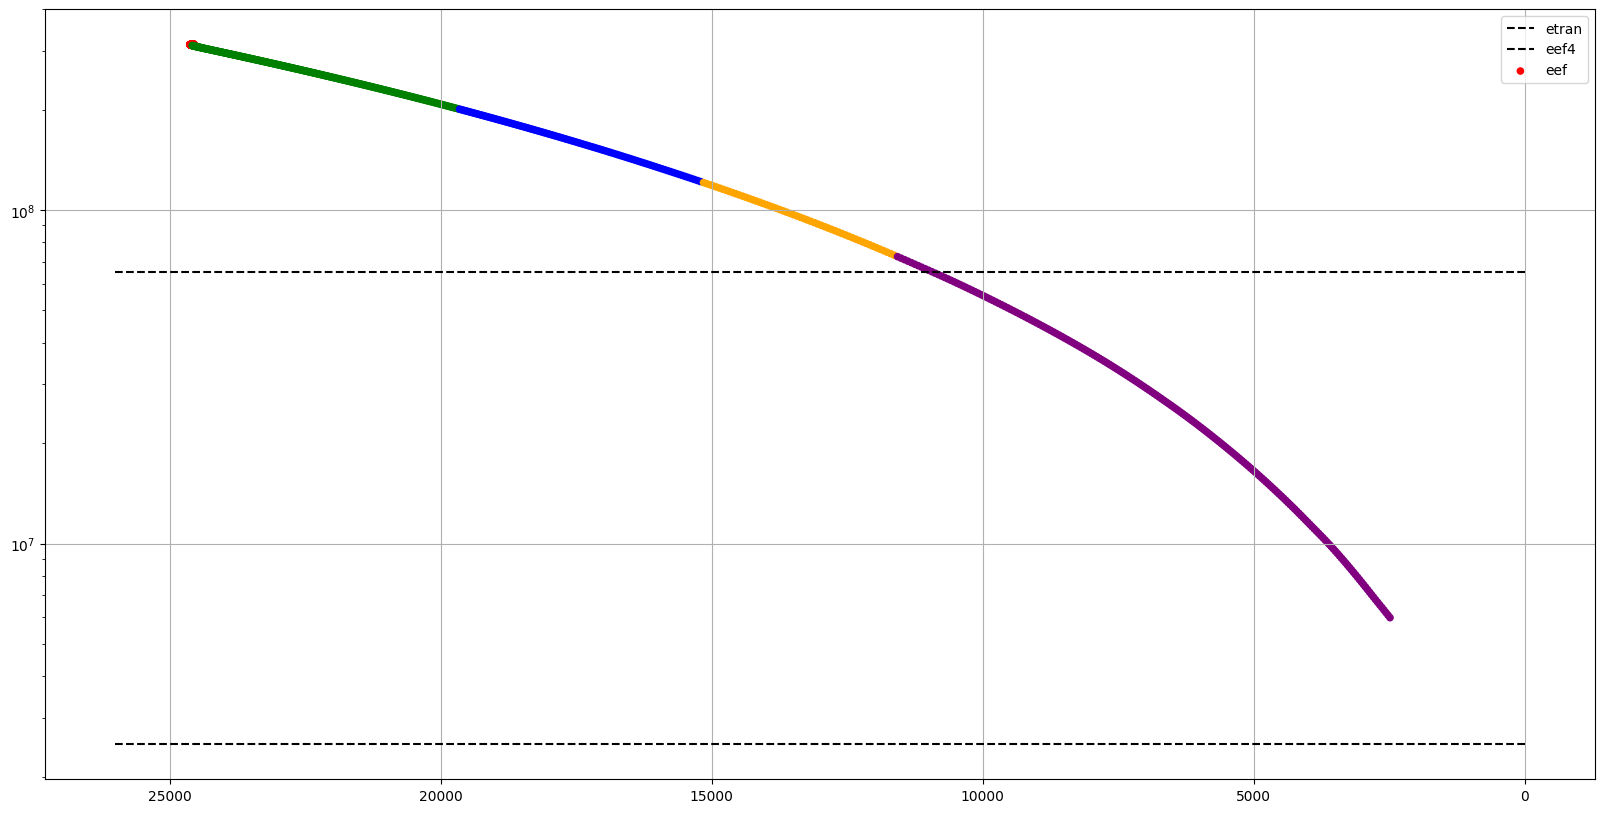

In [40]:
def entry_plots(data):
    
    plt.figure(figsize=(20, 10))
    
    rangekm = data['trange'] / 0.539957

    plt.scatter(data['ve'], rangekm, s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5 , label='alpha')
    
    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()
    
    
    
    sin_B = data['delaz'].apply(lambda az: math.sin(math.radians(az))).to_numpy()
    sin_c = rangekm.apply(lambda r : math.sin(r / 6371) ).to_numpy()
    xr = np.arcsin(np.multiply(sin_B, sin_c)) * 6371


    plt.figure(figsize=(20, 10))
    plt.scatter(data['ve'], xr, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5)

    plt.grid()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()
    
    

    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['alpcmd'], label='alpcmd')
    plt.plot(data['ve'], data['aclam'], '--', c='k', label='alpha lim')
    plt.plot(data['ve'], data['aclim'], '--', c='k')
    plt.scatter(data['ve'], data['alpha'], s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5 , label='alpha')
    
    plt.ylim([0, 45])
    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()



    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['rolcmd'], label='rolcmd')
    plt.plot(data['ve'], data['rollc_2'], label='unlimited roll')
    plt.plot(data['ve'], data['rollc_3'], label='roll ref')
    plt.plot(data['ve'], -data['rlm'], '--', c='k', label='rlm')
    plt.plot(data['ve'], data['rlm'], '--', c='k')
    plt.scatter(data['ve'], data['roll'], s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='roll')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()


    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['lodv'], label='lodv')
    plt.plot(data['ve'], data['lmn'], '--', label='lmn', c='k')
    plt.plot(data['ve'], data['lmn'] / data['xlod'], '--', c='k')
    plt.plot(data['ve'], data['lod'], ':',  label='lod')
    plt.scatter(data['ve'], data['lod'] * np.cos(np.deg2rad(data['roll'])), s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='vert lod')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()

    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['rdtrf'], label='hdref')
    plt.plot(data['ve'], data['dlrdot'], label='dlrdot')
    plt.plot(data['ve'], data['rdtrf'] + data['dlrdot'], label='hdreft_plus_fdbk')
    plt.scatter(data['ve'], data['rdot'] , s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='hdot')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()


    plt.figure(figsize=(20, 10))

    img = plt.imread("drag2.png")
    plt.imshow(img, aspect='auto', extent=[24700, 2450, -1.45, 60.2], alpha=1 , cmap='Greys_r');

    plt.plot(data['ve'], data['drefp'], label='dref')
    plt.scatter(data['ve'], data['drag'] , s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='drag')

    plt.ylim([0, 52])
    
    plt.legend()
    ax = plt.gca()
    plt.grid()


    plt.figure(figsize=(20, 10))

    plt.hlines(6.502262e7, 26000, 0, 'k', '--', label='etran')
    plt.hlines(2.5e6, 26000, 0, 'k', '--', label='eef4')
    plt.scatter(data['ve'], data['eef'] , s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='eef')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    ax.set_yscale('log')
    plt.grid()
    
entry_plots(data_entry)